In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
#read data    
data = pd.read_csv('Dataset.csv')
#show data
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [34]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [35]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [36]:

def gradientDescent(X, y, theta, alpha, iters):

    """
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value. 

    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """

    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[0])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [37]:

def featureNormalise(x):
    
    """
    Returns a normalized version of x where the mean value of
    each feature is 0 and the standard deviation is 1.
    """
    x_norm = x

    # Find mean for each feature
    mu = np.mean(x, axis=0)
    # Subtract mean from data
    x_norm -= mu
    
    # Find std for each feature
    sigma = np.std(x, axis=0)
    # Divide data by std
    x_norm /= sigma
    
    return x_norm, mu, sigma

# rescaling data
data ,mu, sigma = featureNormalise(data)

In [38]:
# add ones column
data.insert(0, 'Ones', 1)
data.head()

,Ones,Size,Bedrooms,Price
0,1,0.131415,-0.226093,0.480890
1,1,-0.509641,-0.226093,-0.084983
2,1,0.507909,-0.226093,0.231097
3,1,-0.743677,-1.554392,-0.876398
4,1,1.271071,1.102205,1.612637


In [39]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [40]:
# convert to matrices and initialize theta
x = np.matrix(x.values)
y = np.matrix(y.values)
theta = np.zeros([1,np.shape(x)[1]])

In [41]:

# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100

# perform linear regression on the data set
theta, cost = gradientDescent(x, y, theta, alpha, iters)

# get the cost (error) of the model
square_error_cost = computeCost(x, y, theta)

In [43]:
# Show Mean Square Error
square_error_cost

0.13353943251916742

In [44]:
# Result of gradient descent
theta

matrix([[-9.54909910e-17,  8.79556572e-01, -4.79694397e-02]])

## Convergence of cost function J

Text(0.5, 1.0, 'Error vs. Training Epoch')

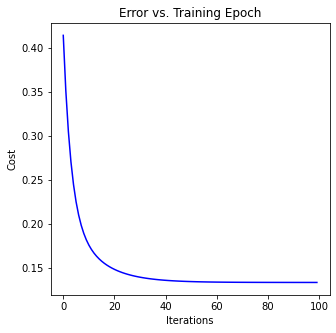

In [46]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'b')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Estimate the price of a 1500 sq-ft, 2 br house

In [73]:
# Normalise data
def normalise(sample_X):
    sample_X -= mu[:2]
    sample_X  /= sigma[:2]
    return np.array(sample_X)

In [74]:
# See if we get the same prediction as before for a 1500 sq-ft, 2 br house
sample_X = np.array([1500., 2.])
sample_X = normalise(sample_X)
sample_X = np.insert(sample_X, 0, 1)
print(sample_X)

[ 1.         -0.63683437 -1.5543919 ]


In [76]:
price = float(np.dot(theta, sample_X))
price = price * sigma[2] + mu[2]
print('Predicted price of a 1500 sq-ft, 2 br house is $%.0f.' % price)

Predicted price of a 1500 sq-ft, 2 br house is $280347.
